In [ ]:
import numpy as np          
import pandas as pd        
from random import randint
from tqdm import tqdm     
import cv2
import matplotlib.pyplot as plt


In [ ]:
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D



In [ ]:
df_train = pd.read_csv("/content/labels.csv")
print(df_train.shape)
df_train.head(10)


(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [ ]:
# Visualize the number of each breeds
breeds_all = df_train["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [ ]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        ax.set_xticks([])
        ax.set_yticks([])
   
    
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/train.zip


Streaming output truncated to the last 5000 lines.
  inflating: 83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: 83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: 83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: 83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: 83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: 83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: 83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: 83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: 83fad0718581a696132c96c166472627.jpg  
  inflating: 83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: 8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: 8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: 840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: 840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: 840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: 8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: 841463629c4833816e216cbb041c2778.jpg  
  inflating: 8429dcca4ae91c4e0345e4ba48b0d69f.jpg  
  inflating: 

In [ ]:
img_width=250
img_height=250
images=[]
classes=[]
#load training images
for f, breed in tqdm(df_train.values):
    img = cv2.imread('/content/{}.jpg'.format(f))
    classes.append(breed)
    images.append(cv2.resize(img, (img_width, img_height)))

100%|██████████| 10222/10222 [00:33<00:00, 308.23it/s]


[7539, 8866, 5491, 1773, 5535, 8683, 6679, 166, 1240]
Images to show: 9
Classes to show: 9


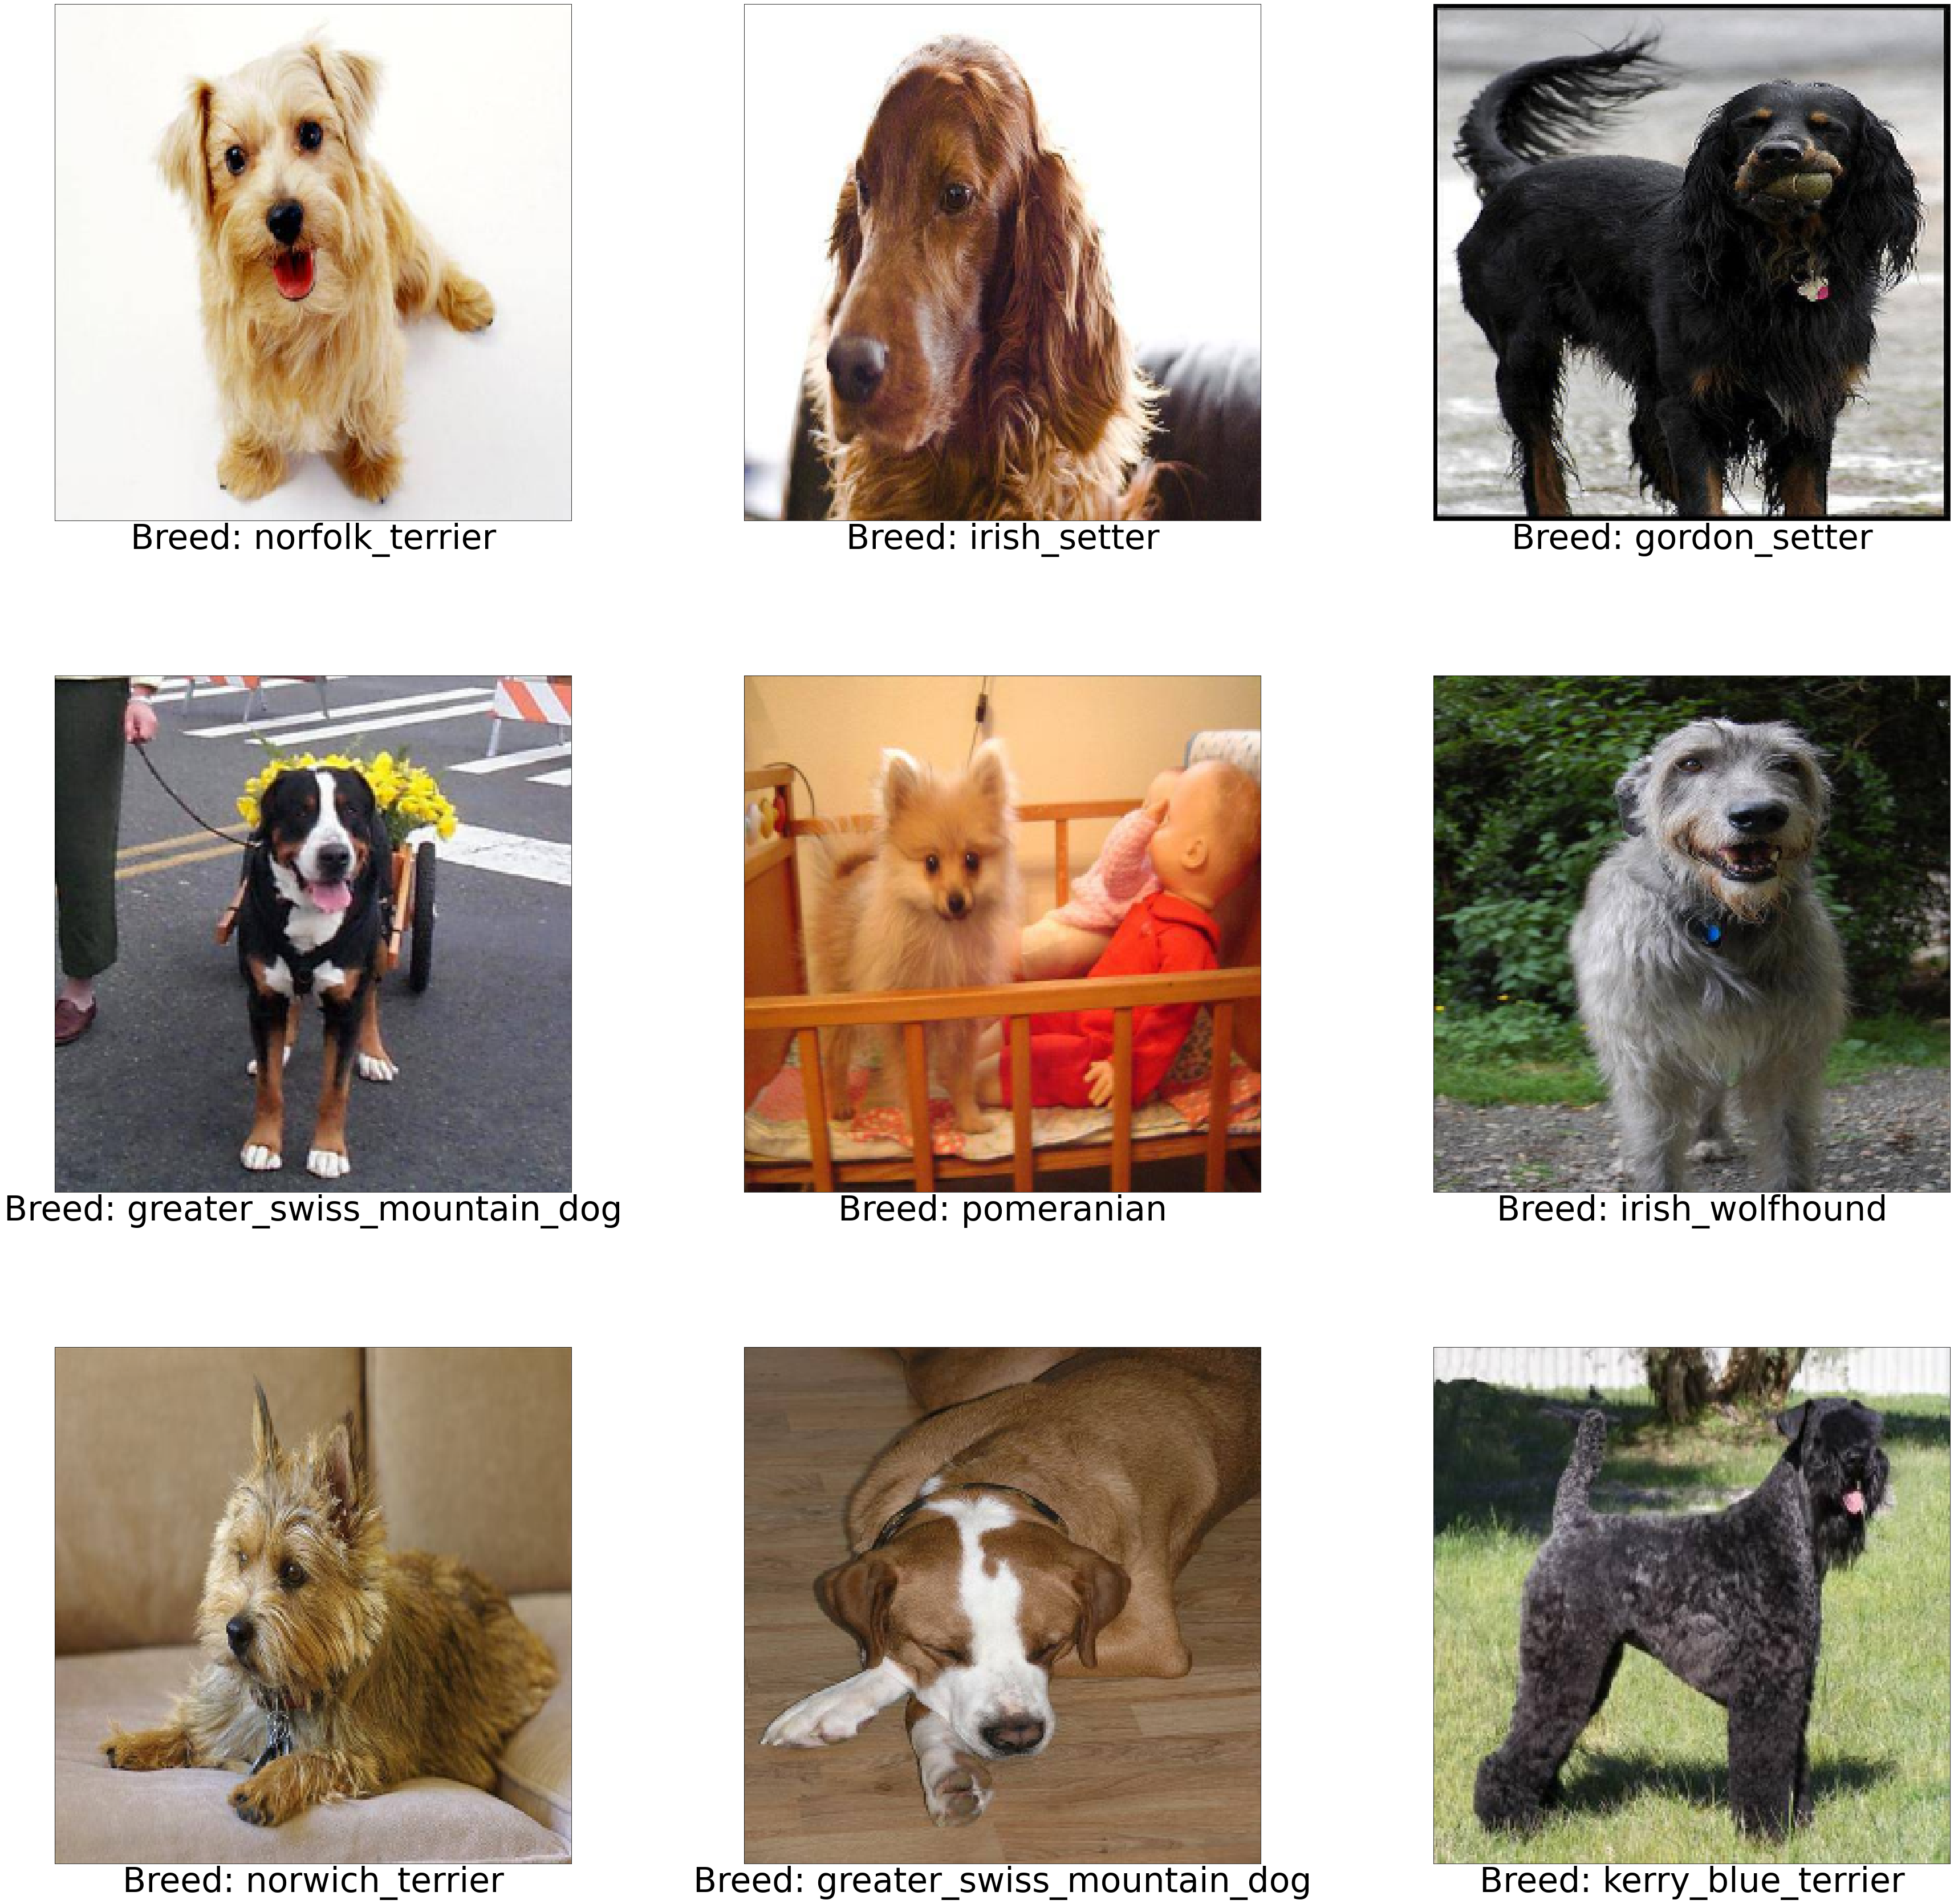

In [ ]:
# select random images
random_numbers = [randint(0, len(images)) for p in range(0,9)]
print(random_numbers)
images_to_show = [images[i] for i in random_numbers]
classes_to_show = [classes[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))


plot_images(images_to_show, classes_to_show)
   

In [ ]:
# Selecting first 3 breeds 
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = df_train[(df_train['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()


,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [ ]:
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/content/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:01<00:00, 267.41it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [ ]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = "adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [ ]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
# Training the model
epochs = 50
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/40
2/2 [==============================] - 16s 2s/step - loss: 4.8615 - accuracy: 0.3164 - val_loss: 4.6877 - val_accuracy: 0.4000
Epoch 2/40
2/2 [==============================] - 1s 381ms/step - loss: 4.6355 - accuracy: 0.4141 - val_loss: 4.4734 - val_accuracy: 0.3692
Epoch 3/40
2/2 [==============================] - 1s 390ms/step - loss: 4.4185 - accuracy: 0.4688 - val_loss: 4.2599 - val_accuracy: 0.5077
Epoch 4/40
2/2 [==============================] - 1s 390ms/step - loss: 4.1819 - accuracy: 0.5508 - val_loss: 4.0132 - val_accuracy: 0.4615
Epoch 5/40
2/2 [==============================] - 1s 386ms/step - loss: 3.9115 - accuracy: 0.6445 - val_loss: 3.9515 - val_accuracy: 0.4615
Epoch 6/40
2/2 [==============================] - 1s 382ms/step - loss: 3.8459 - accuracy: 0.4805 - val_loss: 3.9484 - val_accuracy: 0.3538
Epoch 7/40
2/2 [==============================] - 1s 380ms/step - loss: 3.7286 - accuracy: 0.4922 - val_loss: 3.5038 - val_accuracy: 0.6000
Epoch 8/40
2/2 [======

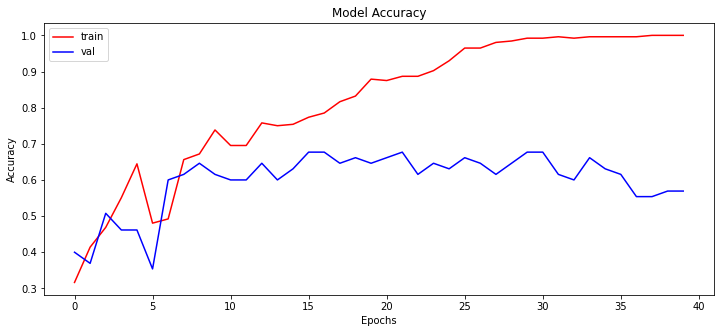

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 9ms/step - loss: 3.4916 - accuracy: 0.5833
Accuracy over the test set: 
  58.33 %


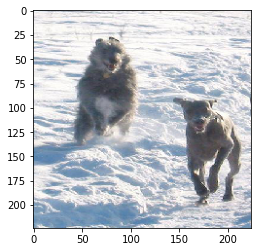

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [ ]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()
2
print("Originally : ",labels['breed'][np.argmax(Y_test[2])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[2])])

In [ ]:

import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

#building the model using ResNet50V2 with input shape of our image array
#weights for our network will be from of imagenet dataset
#we will not include the first Dense layer
resnet = ResNet50V2(input_shape = [224,224,3], weights='imagenet', include_top=False)
#freeze all trainable layers and train only top layers 
for layer in resnet.layers:
    layer.trainable = False
 
#add global average pooling layer and Batch Normalization layer
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
#add fully connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
#add output layer having the shape equal to number of breeds
from tensorflow.keras.models import Model

predictions = Dense(5, activation='softmax')(x)
 
#create model class with inputs and outputs
model = Model(inputs=resnet.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, 
                                     Y_train, 
                                     batch_size=batch_size)

test_generator = test_datagen.flow(X_test, 
                                     Y_test, 
                                     batch_size=batch_size)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

#epochs for model training and learning rate for optimizer
epochs = 20
learning_rate = 1e-3
 
#using RMSprop optimizer to compile or build the model
optimizer = RMSprop(learning_rate=learning_rate,rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
 
#fit the training generator data and train the model
hist = model.fit(train_generator,
                 steps_per_epoch= X_train.shape[0] // batch_size,
                 epochs= epochs,
                 validation_data= test_generator,
                 validation_steps= X_test.shape[0] // batch_size)
 
#Save the model for prediction
model.save("model")

Epoch 1/20


InvalidArgumentError: ignored